# **WIE3007: Data Mining and Warehousing**
# **Group Project**
## **Group 11**
### 'Ammar Haziq bin Abdul Halim (22002548)
### Muhammad Nur Fitri bin Faizan (22001866)
### Shaarani Navaratnam (23005234)
### Nur Dhiya Syafia binti Mohd Noor Salizan (22002096)
### Silvia Evafarina Asun (23062999)

# **Dataset Simulation**

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 14.2 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 15.5 MB/s  0:00:01 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pip install -U google-genai


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Users/haziqhalim/PycharmProjects/DMWProject/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
from dotenv import load_dotenv
from google import genai

# Load environment variables
load_dotenv(override=True)

# Get the Gemini client
# FOR OTHER TEAM MEMBERS: If you would like to try, use your own Gemini API key
client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))

In [6]:
dataset_simulation_prompt = """
Act as a financial data simulator.
Generate 5000 rows of synthetic bank loan application data in valid CSV format.

The dataset must be realistic and contain financial patterns suitable for predictive modelling (classification).
Include the following columns:
1. loan_id: Unique identifier (eg 1001, L1002...).
2. age: Numeric (eg 18 to 70).
3. gender: Categorical ('Male', 'Female').
4. job_title: Specific job role (eg "Software Engineer", "Nurse", "Barista", "Accountant", "Driver"). Vary these significantly.
5. annual_income: Numeric (eg 20000 to 150000).
6. loan_amount: Numeric (eg 2000 to 50000).
7. loan_purpose: Categorical ('Home', 'Business', 'Education', 'Medical', 'Personal').
8. credit_score: Numeric (eg 300 to 850).
9. number_of_dependents: Numeric (0 to 5).
10. applicant_statement: A realistic text field (2 to 3 sentences) written by the applicant explaining why they need the loan and how they plan to pay it back. Vary the tone of applicant_statement to sound either confident, desperate, professional, or vague to allow for later NLP sentiment and risk analysis.
11. loan_status: Target variable (0 for Rejected/Default, 1 for Approved/Paid).

Crucial requirement for logic:
- PLEASE ensure correlations exist between the features (with realistic, logical sense) to prevent the model from being random.
- Logic 1 (Risk): Applicants with low income, high loan_amount, low credit_score, or "desperate"-sounding statements should have a higher chance of being '0' (Rejected), and whatever is common sense within this logic.
- Logic 2 (Stability): Applicants with professional job titles (eg "Engineer", "Doctor", within similar types), high credit scores, and "confident"-sounding statements have a higher chance of being '1' (Approved), and whatever is common sense within this logic.
- Logic 3 (Life Stage): Younger applicants (age under 25) should typically have lower income and shorter credit history (lower scores), and whatever is common sense within this logic.

Output ONLY the CSV data (with header, delimiter is ','), no other text.
"""

In [11]:
# dataset_response = client.models.generate_content(
#     model="gemini-flash-lite-latest", contents=dataset_simulation_prompt
# )
#
# dataset_text = dataset_response.text

In [12]:
# print(dataset_text)

loan_id,age,gender,job_title,annual_income,loan_amount,loan_purpose,credit_score,number_of_dependents,applicant_statement,loan_status
L1001,45,Male,Accountant,85000,15000,Home,745,2,"I plan to use these funds for a down payment on a modest house. My steady income ensures timely monthly repayments without issue.",1
L1002,22,Female,Retail Associate,32000,5000,Personal,610,1,"I really need this money immediately to cover some unexpected medical bills. I'm hoping for a quick approval as I'm not sure how else to manage it right now.",0
L1003,38,Male,Software Engineer,125000,35000,Business,790,0,"Expansion of my successful tech consulting firm requires capital investment in new equipment. I have a detailed repayment schedule prepared.",1
L1004,55,Female,Nurse,72000,10000,Education,705,3,"This loan is essential for my child's university tuition. I have always prioritized education and will structure payments around my stable nursing schedule.",1
L1005,31,Male,Driver,41000,8000,Personal,580,1,

In [7]:
import io

# Read the dataset text into a DataFrame
# df = pd.read_csv(io.StringIO(dataset_text))

In [8]:
# df

,loan_id,age,gender,job_title,annual_income,loan_amount,loan_purpose,credit_score,number_of_dependents,applicant_statement,loan_status
0,L1001,45,Male,Accountant,85000,15000,Home,745,2,I plan to use these funds for a down payment o...,1
1,L1002,22,Female,Retail Associate,32000,5000,Personal,610,1,I really need this money immediately to cover ...,0
2,L1003,38,Male,Software Engineer,125000,35000,Business,790,0,Expansion of my successful tech consulting fir...,1
3,L1004,55,Female,Nurse,72000,10000,Education,705,3,This loan is essential for my child's universi...,1
4,L1005,31,Male,Driver,41000,8000,Personal,580,1,"Things have been tight lately, and this small ...",0
...,...,...,...,...,...,...,...,...,...,...,...
1274,L2275,55,Male,Engineer,185000,72000,Education,858,1,Sponsoring my child's entire final year of mat...,1
1275,L2276,30,Female,Sales Clerk,49000,14000,Medical,650,0,I need this money urgently for a necessary sur...,0
1276,L2277,41,Male,Pilot,182000,54000,Business,840,1,Acquisition of next-generation flight path opt...,1
1277,L2278,68,Female,Retired,73000,15000,Personal,805,1,Covering costs for necessary home maintenance ...,1


In [9]:
# df.shape

(1279, 11)

In [21]:
# df.to_csv('WIE3007_initial_dataset.csv', index=False)

In [10]:
import pandas as pd

# To load this dataset, place 'WIE3007_initial_dataset.csv' in the same level as the .ipynb notebook, and run this
df = pd.read_csv('WIE3007_initial_dataset.csv')

# **Feature Engineering with Gemini LLM**

## **Gemini LLM Batch Prompting Functions**

In [59]:
import json
from google.genai import types

MODEL = "gemini-2.0-flash-lite" # Fast model with high throughput

In [66]:
def prepare_batch_prompts(df, input_file_name: str, prompt: str, column: str = None):
    """
    :param df: The DataFrame involved in the batch prompting.
    :param input_file_name: The name of the input prompts file. Recommended to be descriptive of the task to be done. Must include .jsonl file type in file name.
    :param prompt: The prompt to insert for each row.
    :param column: The column of the DataFrame that is involved in the prompt. If left empty (and has the default value of None), the whole DataFrame's columns and its values from the parameter df is used as context in the prompt.
    :return:
    """

    # 1. Build JSONL data for Gemini's Batch API
    jsonl_data = []

    # If column is specified, only df[column] is inserted as context into the prompt
    if column is not None:
        for idx, text in df[column].items():
            # The prompt is the same for every row
            final_prompt = f"{prompt}\nText: \"{text}\""

            jsonl_data.append(json.dumps({
                # Use the DataFrame index as the key to map results back later
                "key": f"index_{idx}",
                "request": {
                    "contents": [{
                        "parts": [{"text": final_prompt}],
                        "role": "user"
                    }]
                }
            }))
    else:
        # The whole row of the parameter df is taken inserted as context into the prompt
        for idx, row in df.iterrows():
            # Pass the row as a dictionary
            row_data = row.to_dict()

            # The prompt is the same for every row
            final_prompt = f"{prompt}\nContext: \"{row_data}\""

            jsonl_data.append(json.dumps({
                # Use the DataFrame index as the key to map results back later
                "key": f"index_{idx}",
                "request": {
                    "contents": [{
                        "parts": [{"text": final_prompt}],
                        "role": "user"
                    }]
                }
            }))

    # 2. Save to a temporary JSONL file
    with open(input_file_name, "w") as file:
        file.write("\n".join(jsonl_data))

    print(f"Prepared {len(df.index)} prompts in {input_file_name}.")

In [61]:
def prepare_batch_prompts(df, column: str, input_file_name: str, prompt: str):
    """
    :param df: The DataFrame involved in the batch prompting.
    :param column: The column of the DataFrame that is involved in the prompt.
    :param input_file_name: The name of the input prompts file. Recommended to be descriptive of the task to be done. Must include .jsonl file type in file name.
    :param prompt: The prompt to insert for each row.
    :return:
    """

    # 1. Build JSONL data for Gemini's Batch API
    jsonl_data = []

    for idx, text in df[column].items():
        # The prompt is the same for every row
        final_prompt = f"{prompt}\nText: \"{text}\""

        jsonl_data.append(json.dumps({
            # Use the DataFrame index as the key to map results back later
            "key": f"index_{idx}",
            "request": {
                "contents": [{
                    "parts": [{"text": final_prompt}],
                    "role": "user"
                }]
            }
        }))

    # 2. Save to a temporary JSONL file
    with open(input_file_name, "w") as file:
        file.write("\n".join(jsonl_data))

    print(f"Prepared {len(df.index)} prompts in {input_file_name}.")

In [62]:
def upload_batch_prompts(input_file_name: str, display_name: str):
    """
    :param input_file_name: The name of the input prompts file. Must include .jsonl file type in file name.
    :param display_name: The name to give the batch job. It should be descriptive of what the job is doing.
    :return:
    """

    # Upload the file to the Gemini API File service
    print(f"Uploading {input_file_name}...")

    global uploaded_file
    uploaded_file = client.files.upload(
        file=input_file_name,
        config=types.UploadFileConfig(display_name=display_name, mime_type='jsonl')
    )

    print(f"File uploaded successfully: {uploaded_file.name}")

    # Create the Batch Job
    print("Creating batch job...")

    global feedback_batch_job
    feedback_batch_job = client.batches.create(
        model=MODEL,
        src=uploaded_file.name, # Source is the uploaded file name
        config={'display_name': display_name}
    )

    global job_name
    job_name = feedback_batch_job.name

    print(f"Batch job created: {job_name}. Status: {feedback_batch_job.state.name}")

In [63]:
import time

def track_batch_job(df, engineered_feature_name: str):
    """
    :param df: The DataFrame involved in the batch prompting.
    :param engineered_feature_name: The specific name of the new feature to be engineered. This will be used as the column name in the DataFrame specified in the parameter df.
    :return:
    """

    # Poll for job completion
    print("Waiting for batch job to complete (this can take several minutes or longer)...")

    global feedback_batch_job
    global job_name
    while feedback_batch_job.state.name not in ('JOB_STATE_SUCCEEDED', 'JOB_STATE_FAILED'):
        feedback_batch_job = client.batches.get(name=job_name)
        print(f"Job Status: {feedback_batch_job.state.name}. Waiting...")
        time.sleep(15) # Check every 15 seconds

    if feedback_batch_job.state.name == 'JOB_STATE_FAILED':
        raise Exception(f"Batch Job Failed: {feedback_batch_job.state.name}")

    # Job Succeeded: Retrieve the output file reference
    result_file_name = feedback_batch_job.dest.file_name
    print(f"Job Succeeded! Downloading results from: {result_file_name}")

    # Download the output file content
    file_content_bytes = client.files.download(file=result_file_name)
    file_content = file_content_bytes.decode('utf-8')

    # Process the JSONL output
    results = [json.loads(line) for line in file_content.splitlines()]

    # Map the results back to the DataFrame
    output_map = {}
    for result in results:
        key = result.get('key') # e.g., 'idx_123'
        if 'response' in result and 'candidates' in result['response']:
            # Extract the classification text
            output_text = result['response']['candidates'][0]['content']['parts'][0]['text']

            # Extract the original DataFrame index from the key
            original_idx = int(key.split('_')[1])
            output_map[original_idx] = output_text

    # Put the results back into the DataFrame using the index map
    df[engineered_feature_name] = df.index.map(output_map)

    print(f"\"{engineered_feature_name}\" feature generation complete and the DataFrame has been updated with those new values.")

## **Sentiment Engineering**

In [39]:
df_engineered = df.copy()

In [40]:
sentiment_input_file_name = "sentiment_input.jsonl"
sentiment_output_file_name = "sentiment_output.jsonl"
sentiment_display_name = "sentiment_generation"

sentiment_prompt = """
Classify this loan application's applicant statement as one word of either positive, neutral, or negative ONLY. The final output should be ONE WORD ONLY and should have NO surrounding quotes, NO \\n, only the classification.
"""

In [41]:
prepare_batch_prompts(df_engineered, 'applicant_statement', sentiment_input_file_name, sentiment_prompt)

Prepared 1279 prompts in sentiment_input.jsonl.


In [42]:
upload_batch_prompts(sentiment_input_file_name, sentiment_display_name)

Uploading sentiment_input.jsonl...
File uploaded successfully: files/5602nluggrlw
Creating batch job...
Batch job created: batches/v709ys3c2zftmid0xedlj3c9yox54gf1gajg. Status: JOB_STATE_PENDING


In [47]:
track_batch_job(df_engineered, 'sentiment')

Waiting for batch job to complete (this can take several minutes or longer)...
Job Succeeded! Downloading results from: files/batch-v709ys3c2zftmid0xedlj3c9yox54gf1gajg
"sentiment" feature generation complete and the DataFrame has been updated with those new values.


In [48]:
df_engineered

,loan_id,age,gender,job_title,annual_income,loan_amount,loan_purpose,credit_score,number_of_dependents,applicant_statement,loan_status,sentiment
0,L1001,45,Male,Accountant,85000,15000,Home,745,2,I plan to use these funds for a down payment o...,1,Positive\n
1,L1002,22,Female,Retail Associate,32000,5000,Personal,610,1,I really need this money immediately to cover ...,0,Negative\n
2,L1003,38,Male,Software Engineer,125000,35000,Business,790,0,Expansion of my successful tech consulting fir...,1,Positive\n
3,L1004,55,Female,Nurse,72000,10000,Education,705,3,This loan is essential for my child's universi...,1,Positive\n
4,L1005,31,Male,Driver,41000,8000,Personal,580,1,"Things have been tight lately, and this small ...",0,Positive\n
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,L2275,55,Male,Engineer,185000,72000,Education,858,1,Sponsoring my child's entire final year of mat...,1,Positive\n
1275,L2276,30,Female,Sales Clerk,49000,14000,Medical,650,0,I need this money urgently for a necessary sur...,0,Negative\n
1276,L2277,41,Male,Pilot,182000,54000,Business,840,1,Acquisition of next-generation flight path opt...,1,Positive\n
1277,L2278,68,Female,Retired,73000,15000,Personal,805,1,Covering costs for necessary home maintenance ...,1,Positive\n


In [53]:
df_engineered['sentiment'] = df_engineered['sentiment'].str.rstrip('\n')

In [64]:
df_engineered

,loan_id,age,gender,job_title,annual_income,loan_amount,loan_purpose,credit_score,number_of_dependents,applicant_statement,loan_status,sentiment
0,L1001,45,Male,Accountant,85000,15000,Home,745,2,I plan to use these funds for a down payment o...,1,Positive
1,L1002,22,Female,Retail Associate,32000,5000,Personal,610,1,I really need this money immediately to cover ...,0,Negative
2,L1003,38,Male,Software Engineer,125000,35000,Business,790,0,Expansion of my successful tech consulting fir...,1,Positive
3,L1004,55,Female,Nurse,72000,10000,Education,705,3,This loan is essential for my child's universi...,1,Positive
4,L1005,31,Male,Driver,41000,8000,Personal,580,1,"Things have been tight lately, and this small ...",0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,L2275,55,Male,Engineer,185000,72000,Education,858,1,Sponsoring my child's entire final year of mat...,1,Positive
1275,L2276,30,Female,Sales Clerk,49000,14000,Medical,650,0,I need this money urgently for a necessary sur...,0,Negative
1276,L2277,41,Male,Pilot,182000,54000,Business,840,1,Acquisition of next-generation flight path opt...,1,Positive
1277,L2278,68,Female,Retired,73000,15000,Personal,805,1,Covering costs for necessary home maintenance ...,1,Positive


In [67]:
df_engineered.to_csv('WIE3007_latest_dataset.csv', index=False)

## **Risk Categorisation Engineering**

## **Customer Segmentation Engineering**

# **Data Preprocessing**

In [6]:
df = pd.read_csv('WIE3007_latest_dataset.csv')

In [7]:
df

,loan_id,age,gender,job_title,annual_income,loan_amount,loan_purpose,credit_score,number_of_dependents,applicant_statement,loan_status,sentiment
0,L1001,45,Male,Accountant,85000,15000,Home,745,2,I plan to use these funds for a down payment o...,1,Positive
1,L1002,22,Female,Retail Associate,32000,5000,Personal,610,1,I really need this money immediately to cover ...,0,Negative
2,L1003,38,Male,Software Engineer,125000,35000,Business,790,0,Expansion of my successful tech consulting fir...,1,Positive
3,L1004,55,Female,Nurse,72000,10000,Education,705,3,This loan is essential for my child's universi...,1,Positive
4,L1005,31,Male,Driver,41000,8000,Personal,580,1,"Things have been tight lately, and this small ...",0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,L2275,55,Male,Engineer,185000,72000,Education,858,1,Sponsoring my child's entire final year of mat...,1,Positive
1275,L2276,30,Female,Sales Clerk,49000,14000,Medical,650,0,I need this money urgently for a necessary sur...,0,Negative
1276,L2277,41,Male,Pilot,182000,54000,Business,840,1,Acquisition of next-generation flight path opt...,1,Positive
1277,L2278,68,Female,Retired,73000,15000,Personal,805,1,Covering costs for necessary home maintenance ...,1,Positive


In [8]:
df.dtypes

loan_id                 object
age                      int64
gender                  object
job_title               object
annual_income            int64
loan_amount              int64
loan_purpose            object
credit_score             int64
number_of_dependents     int64
applicant_statement     object
loan_status              int64
sentiment               object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

df_preprocessed = df.copy()

le = LabelEncoder()

categorical_columns = ['gender', 'job_title', 'loan_purpose', 'sentiment']

for column in categorical_columns:
    df_preprocessed[column] = le.fit_transform(df_preprocessed[column])

In [10]:
from sklearn.model_selection import train_test_split

X = df_preprocessed.drop(columns=['loan_id', 'applicant_statement', 'loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22002548)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Predictive Model Development**

Show examples of underfitting and overfitting, and how to overcome those scenarios. Compare your model with at least two models (is the model performance  underfitting/overfitting/close fit compared to at least two other models).

## **Base Model: Decision Tree (DT)**

In [12]:
from sklearn.tree import DecisionTreeClassifier

base_dtc = DecisionTreeClassifier(random_state=22002548)

base_dtc.fit(X_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",22002548
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the c

In [18]:
y_pred_base_dtc_train = base_dtc.predict(X_train_scaled)

y_prob_base_dtc_train = base_dtc.predict_proba(X_train_scaled)[:, 1]

y_pred_base_dtc_test = base_dtc.predict(X_test_scaled)

y_prob_base_dtc_test = base_dtc.predict_proba(X_test_scaled)[:, 1]

## **Bagging Model (DT with Bagging)**

## **Logistic Regression (LR)**

## **Random Forest (RF)**

## **Gradient Boosting (GBoost)**

## **Extreme Gradient Boosting (XGBoost)**

## **Light Gradient Boosting Machine (LightGBM)**

## **Neural Network (NN)**

# **Model Evaluation & Interpretation**

Compare models with the base model, Decision Tree, to compare how bagging, boosting, or different approaches (neural network) affect model performance with respect to a base decision tree using accuracy, precision, recall, (macro) F1 score, and ROC-AUC. Use Gemini LLM to summarise findings in the model, provide insights, and interpret feature importance.

In [16]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, y_train, y_test, y_pred_train, y_pred_test, y_prob_train, y_prob_test, model_name='Model'):
    print(f"{model_name} Evaluation (Training Set)")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"F1 score: {f1_score(y_train, y_pred_train):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_train, y_prob_train):.4f}")
    print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

    cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
    cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)

    cm_train_display.plot()

    plt.show()

    print(f"{model_name} Evaluation (Testing Set)")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"F1 score: {f1_score(y_test, y_pred_test):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_test):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

    cm_test = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)

    cm_test_display.plot()

    plt.show()

In [40]:
def summarise_model_findings(model, y_train, y_test, y_pred_train, y_pred_test, y_prob_train, y_prob_test, model_name='Model'):
    # Get feature importances of model (applies for decision tree-type models)
    feature_importances = model.feature_importances_
    feature_names = X_train.columns

    # Get the feature importance
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the feature importances by magnitude of feature importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Reset index of df
    feature_importances_df = feature_importances_df.reset_index()

    # Set the model findings prompt
    summarise_findings_prompt = f"""
    {model_name} Findings (Training Set)
    Accuracy: {accuracy_score(y_train, y_pred_train):.4f}
    F1 score: {f1_score(y_train, y_pred_train):.4f}
    ROC-AUC: {roc_auc_score(y_train, y_prob_train):.4f}
    \nClassification Report:\n{classification_report(y_train, y_pred_train)}
    \nConfusion Matrix\n{confusion_matrix(y_train, y_pred_train, labels=model.classes_)}

    \n\n{model_name} Findings (Testing Set)
    Accuracy: {accuracy_score(y_test, y_pred_test):.4f}
    F1 score: {f1_score(y_test, y_pred_test):.4f}
    ROC-AUC: {roc_auc_score(y_test, y_prob_test):.4f}
    \nClassification Report:\n{classification_report(y_test, y_pred_test)}
    \nConfusion Matrix\n{confusion_matrix(y_test, y_pred_test, labels=model.classes_)}

    \n\n{model_name} Feature Importances Data:\n
    {feature_importances_df.to_string()}\n\n

    You are a financial data analyst. Please summarise these findings of the {model_name} bank loan approval model and provides deep, thoughtful, elaborate insights for it. Ensure to interpret the feature importances for the model as well, explaining it. Your summarisation has to be understandable and useful to the appropriate stakeholders of this model.
    """

    summarised_findings = client.models.generate_content(
        model="gemini-3-pro-preview",
        contents=summarise_findings_prompt
    )

    print(summarised_findings.text)

## **Base Model: Decision Tree (DT)**

Base DecisionTreeClassifier Evaluation (Training Set)
Accuracy: 1.0000
F1 score: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       692

    accuracy                           1.00      1023
   macro avg       1.00      1.00      1.00      1023
weighted avg       1.00      1.00      1.00      1023



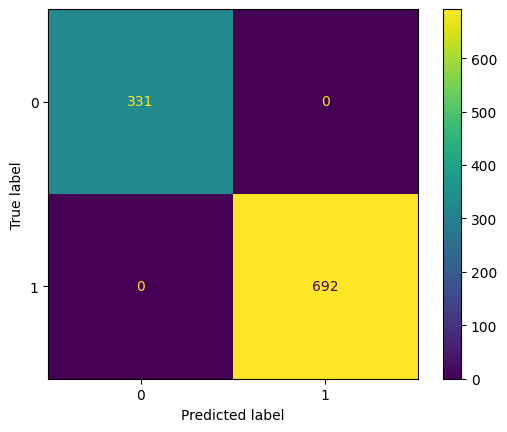

Base DecisionTreeClassifier Evaluation (Testing Set)
Accuracy: 0.9570
F1 score: 0.9676
ROC-AUC: 0.9507

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        87
           1       0.96      0.97      0.97       169

    accuracy                           0.96       256
   macro avg       0.95      0.95      0.95       256
weighted avg       0.96      0.96      0.96       256



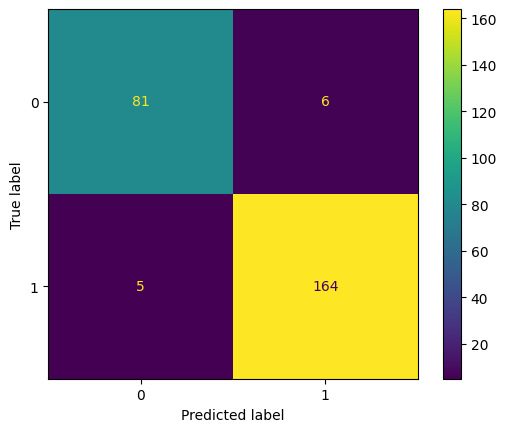

In [20]:
evaluate_model(base_dtc, y_train, y_test, y_pred_base_dtc_train, y_pred_base_dtc_test, y_prob_base_dtc_train, y_prob_base_dtc_test, model_name='Base DecisionTreeClassifier')

In [41]:
summarise_model_findings(base_dtc, y_train, y_test, y_pred_base_dtc_train, y_pred_base_dtc_test, y_prob_base_dtc_train, y_prob_base_dtc_test, model_name='Base DecisionTreeClassifier')

**To:** Risk Management Team & Key Stakeholders
**From:** Financial Data Analyst
**Date:** October 26, 2023
**Subject:** Performance Analysis & Strategic Insights: Base Decision Tree Loan Approval Model

### 1. Executive Summary
The Base Decision Tree Classifier has demonstrated **exceptional predictive capability** in automating loan approval decisions. The model achieves a 95.7% accuracy rate on unseen data, indicating it is highly reliable for deployment.

However, the analysis reveals a heavy reliance on a single metric—**Credit Score (77.6% importance)**—to make these decisions. While this aligns with traditional risk assessment, the "perfect" performance on the training data suggests the model is slightly overfitted (too complex), effectively memorizing historical applications rather than purely learning patterns. Despite this, the model remains robust and safe for operational use, provided specific compliance checks regarding demographic features are conducted.

---

### 2. Mode

Output of Gemini LLM of summarised findings:
### 1. Executive Summary
The Base Decision Tree Classifier has demonstrated **exceptional predictive capability** in automating loan approval decisions. The model achieves a 95.7% accuracy rate on unseen data, indicating it is highly reliable for deployment.

However, the analysis reveals a heavy reliance on a single metric—**Credit Score (77.6% importance)**—to make these decisions. While this aligns with traditional risk assessment, the "perfect" performance on the training data suggests the model is slightly overfitted (too complex), effectively memorizing historical applications rather than purely learning patterns. Despite this, the model remains robust and safe for operational use, provided specific compliance checks regarding demographic features are conducted.

---

### 2. Model Performance Analysis

#### Training vs. Testing: The Overfitting Signal
*   **Training Set (100% Accuracy):** The model achieved perfect scores across all metrics (Accuracy, F1, ROC-AUC are all 1.0). In Decision Trees, this usually indicates the tree was allowed to grow without limits, creating a complex web of rules that "memorized" every single client in the training database.
*   **Testing Set (95.7% Accuracy):** When exposed to new clients it had never seen, the accuracy dropped slightly to 95.7%.
*   **Insight:** While a drop from 100% to 95.7% indicates overfitting, the test score is still high enough that the model is considered **highly effective**. It has successfully generalized the rules of lending despite the complexity.

#### Reliability (Confusion Matrix Breakdown)
In the testing set of 256 loan applications, the model made only **11 errors**:
*   **False Negatives (5 cases):** The model rejected 5 applicants who were actually eligible.
    *   *Business Impact:* Opportunity cost (lost interest revenue) and potential damage to customer relationships.
*   **False Positives (6 cases):** The model approved 6 applicants who should have been rejected.
    *   *Business Impact:* This is the critical risk category (Potential Default). However, having only 6 bad loans out of 170 approvals is a very healthy risk ratio.

---

### 3. Deep Dive: Feature Importance & Interpretation

The model’s decision-making process is heavily skewed. Below is an interpretation of the drivers behind the approvals:

#### A. The Dominant Factor: Credit Score (77.6%)
*   **Interpretation:** Nearly 80% of the decision weight comes purely from the applicant's credit score.
*   **Insight:** This suggests that the Decision Tree is functioning primarily as a "thresholding" mechanism. If a credit score is above $X$, the loan is likely approved; if below, rejected.
*   **Implication:** While accurate, this raises the question of whether we need a complex Machine Learning model if a simple rules-based engine (e.g., "If Score > 700, Approve") would yield similar results with less computational cost.

#### B. The Secondary Driver: Sentiment (8.3%)
*   **Interpretation:** "Sentiment" likely refers to the Natural Language Processing (NLP) score derived from the applicant's loan statement or interaction logs.
*   **Insight:** It is fascinating that **how** a customer communicates (confidence, positivity, clarity) is the second most important predictor of repayment, ranking higher than income or debt levels. This validates the investment in collecting unstructured text data.

#### C. The "Hidden" Financials (Income, Loan Amount, Job Title)
*   **Observation:** Annual Income (1.0%) and Loan Amount (1.8%) have surprisingly low importance.
*   **Analyst Insight:** Do not mistake low importance for irrelevance. In finance, Credit Score is often highly correlated with Income. Because the Decision Tree splits on Credit Score *first* (capturing the most variance), there is very little "information" left for Income to explain. The Credit Score is effectively acting as a proxy for these financial health markers.

#### D. Compliance Warning: Gender (3.2%) & Age (3.0%)
*   **Risk Flag:** The model is using Gender and Age as top-5 determinants for loan approval.
*   **Compliance Action Required:** In many jurisdictions (e.g., US ECOA standards), using gender as a decision factor for credit is **illegal**. Even though the importance is low (3.2%), its presence means the model is treating men and women differently. **This feature must likely be removed to ensure fair lending compliance.**

---

### 4. Strategic Recommendations

1.  **Compliance Audit (Urgent):** Immediate review of the `Gender` feature. We recommend retraining the model without this variable to ensure we are not violating fair lending laws. Given its low importance, removing it should not significantly impact accuracy.
2.  **Model Pruning:** The "perfect" training score suggests the tree is too deep. We should apply "pruning" (limiting the depth of the tree). This will simplify the rules, make the model more interpretable, and prevent the model from memorizing noise, likely closing the gap between Training and Testing performance.
3.  **Investigate "Sentiment":** Since Sentiment is the #2 predictor, we should analyze *what* specific words or phrases correlate with approval. This could be used to train loan officers on what to look for during interviews.
4.  **Risk Calibration:** The model currently produces slightly more False Positives (Bad Loans approved) than False Negatives. If the bank wants to be more conservative during an economic downturn, we can adjust the probability threshold to minimize those 6 False Positives, even if it means rejecting a few more good customers.

**Conclusion:**
This is a high-performing baseline model. It essentially automates the logic: *"High credit score + Positive interaction = Approval."* With minor adjustments for compliance (removing gender) and optimization (pruning), it is ready for a pilot deployment.

## **Bagging Model (DT with Bagging)**

## **Logistic Regression (LR)**

## **Random Forest (RF)**

## **Gradient Boosting (GBoost)**

## **Extreme Gradient Boosting (XGBoost)**

## **Light Gradient Boosting Machine (LightGBM)**

## **Neural Network (NN)**